In [26]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import VGG16
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

In [3]:
(x_train, y_train), (features_test, label_test)  = tf.keras.datasets.cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

### Classes
| Index | Class      |
|-------|------------|
| 0     | Airplane   |
| 1     | Automobile |
| 2     | Bird       |
| 3     | Cat        |
| 4     | Deer       |
| 5     | Dog        |
| 6     | Frog       |
| 7     | Horse      |
| 8     | Ship       |
| 9     | Truck      |


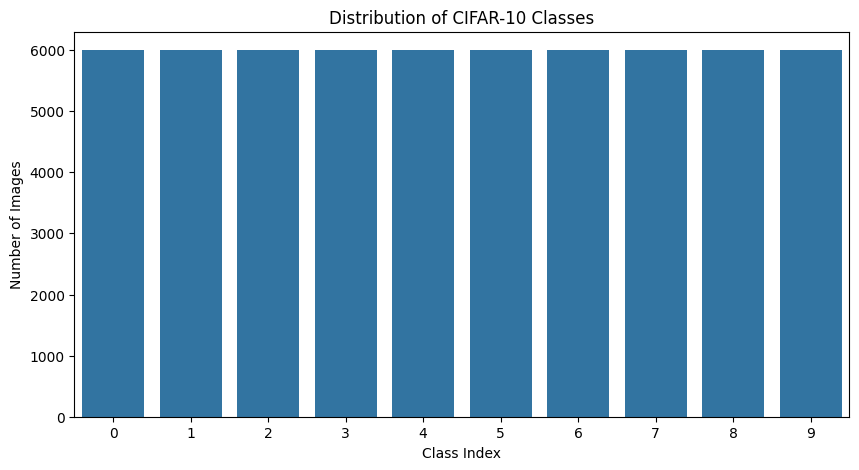

In [8]:
# Flatten the label arrays to a 1D array
label_train_flat = y_train.flatten()
label_test_flat = label_test.flatten()

# Combine train and test labels
all_labels =  list(label_train_flat) + list(label_test_flat)

# Count the number of elements in each category

label_counts = np.unique(all_labels, return_counts=True)[1]

plt.figure(figsize=(10, 5))
sns.barplot(x=list(range(10)), y=label_counts)
plt.xlabel('Class Index')
plt.ylabel('Number of Images')
plt.title('Distribution of CIFAR-10 Classes')
plt.show()

In [14]:
x_test, x_val, y_test, y_val = train_test_split(features_test, label_test, test_size=0.5, random_state=2)
x_test.shape, x_val.shape, y_test.shape, y_val.shape

((5000, 32, 32, 3), (5000, 32, 32, 3), (5000, 1), (5000, 1))

In [15]:
# Creating an Image data generator

train_img_gen = ImageDataGenerator( rescale=1./255
                                  , rotation_range=40
                                  , width_shift_range=0.2
                                  , height_shift_range=0.2
                                  , shear_range=0.1
                                  , zoom_range=0.1
                                  , horizontal_flip=True
                                  , fill_mode='nearest')

val_img_gen = ImageDataGenerator(rescale=1./255)

test_img_gen = ImageDataGenerator(rescale=1./255)

In [21]:
batch_size = 32

train_data_gen = train_img_gen.flow(x_train, y_train,batch_size=batch_size)
val_data_gen = val_img_gen.flow(x_val, y_val, batch_size=batch_size)
test_data_gen = test_img_gen.flow(x_test, y_test, batch_size=batch_size)


In [23]:
model = tf.keras.Sequential([
          layers.Conv2D(1152, kernel_size=(4,4), activation='relu', input_shape=(32, 32 ,3))
        , layers.MaxPooling2D()
        , layers.Conv2D(768, kernel_size=(3,3), activation='relu')
        , layers.MaxPooling2D()
        , layers.Conv2D(384, kernel_size=(3,3), activation='relu')
        , layers.MaxPooling2D()
        , layers.Flatten()
        , layers.Dense(128, activation='relu')
        , layers.Dense(10, activation='softmax')])

I0000 00:00:1728527967.089780      30 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728527967.171109      30 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728527967.171216      30 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728527967.176255      30 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728527967.176335      30 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [24]:
optimizer = tf.keras.optimizers.Adam(0.001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 1152)   │        56,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 1152)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 768)    │     7,963,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 768)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 384)      │     2,654,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       196,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,872,458 (41.48 MB)

 Trainable params: 10,872,458 (41.48 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,  # Stop if improvement is less than this value
    patience=5,       # Wait 5 epochs before stopping
    verbose=1,        # Set to 1 for better logging
    mode="auto",
    restore_best_weights=True  # Restore the best weights after stopping
)

hist = model.fit(
    train_data_gen,
    epochs=100,
    validation_data=val_img_gen,
    callbacks=[callback]  # Pass the callback inside a list
)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4523 - loss: 1.5073

ValueError: Unrecognized data type: x=<keras.src.legacy.preprocessing.image.ImageDataGenerator object at 0x7ff057025d90> (of type <class 'keras.src.legacy.preprocessing.image.ImageDataGenerator'>)

In [12]:
model.evaluate(val_img_gen)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6260 - loss: 1.0750


[1.0770161151885986, 0.6186000108718872]

## Model Selection
I tried different models like ResNet and ResNet50 but Vgg16 model gave me the best results 

Before unfreezing the last 5 layers i tried with all layers freezed and the model performed horribly but after unfreezing it performed really well 

In [13]:
base_model = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

# Fine-tune from this layer onwards
unfreeze = 5

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:-unfreeze]:
  layer.trainable = False

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [14]:
model2 = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [16]:
model2.fit(train_data_gen
           , epochs=10
           , validation_data=val_img_gen
           , verbose=1)

Epoch 1/10


2024-10-09 20:17:58.468438: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1412', 32 bytes spill stores, 32 bytes spill loads

2024-10-09 20:17:58.535124: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1412', 28 bytes spill stores, 28 bytes spill loads

2024-10-09 20:17:58.876413: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1412', 12 bytes spill stores, 12 bytes spill loads

2024-10-09 20:17:59.018692: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1412', 24 bytes spill stores, 24 bytes spill loads

2024-10-09 20:17:59.045110: I external/local_xla/xla/stream_

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.0954 - loss: 2.3069 - val_accuracy: 0.0962 - val_loss: 2.3027
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.0964 - val_loss: 2.3027
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.1016 - loss: 2.3027 - val_accuracy: 0.0962 - val_loss: 2.3027
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.1011 - loss: 2.3027 - val_accuracy: 0.1018 - val_loss: 2.3026
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.0964 - loss: 2.3027 - val_accuracy: 0.1018 - val_loss: 2.3027
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.1013 - loss: 2.3027 - val_accuracy: 0.1032 - val_loss: 2.3025
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.1031 - loss: 2.3026 - val_accuracy: 0.0962 - val_loss: 2.3028
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.0952 - loss: 2.30

In [17]:
model_1_val_acc = model.evaluate(val_img_gen)
model_1_train_acc = model.evaluate(train_data_gen)

model_2_val_acc = model2.evaluate(val_img_gen)
model_2_train_acc = model2.evaluate(train_data_gen)


print("Self created model")
print(f"Training accuracy: {model_1_train_acc[1]}")
print(f"Validation accuracy: {model_1_val_acc[1]}")
print()
print("Transfer Model")
print(f"Training accuracy: {model_2_train_acc[1]}")
print(f"Validation accuracy: {model_2_val_acc[1]}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6204 - loss: 1.0673
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5750 - loss: 1.1918
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0934 - loss: 2.3027
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.1001 - loss: 2.3026
Self created model
Training accuracy: 0.5713800191879272
Validation accuracy: 0.6186000108718872

Transfer Model
Training accuracy: 0.10000000149011612
Validation accuracy: 0.09619999676942825


Confusion Matrix

In [18]:
test_preds = model2.predict(x_test).argmax(axis=1)
test_acc = model2.evaluate(test_img_gen)[1]
print(f"Testing accuracy: {test_acc}")
conf = confusion_matrix(y_test, test_preds)
conf

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1033 - loss: 2.3026
Testing accuracy: 0.10379999876022339


array([[  0, 491,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 519,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 497,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 513,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 511,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 474,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 484,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 518,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 506,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 487,   0,   0,   0,   0,   0,   0,   0,   0]])

In [19]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [20]:
def img_preprocess(path):
    img = load_img(path, target_size=(32, 32))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    
    return img

In [21]:
img = img_preprocess('./deer.jpg')

model2.predict(img).argmax(axis=1)

FileNotFoundError: [Errno 2] No such file or directory: './deer.jpg'

In [ ]:
img = img_preprocess('./plane.jpg')

model2.predict(img).argmax(axis=1)

In [ ]:
img = img_preprocess('./ship.jpg')

model2.predict(img).argmax(axis=1)

## Performance
The model performed good as it predicted 2 images correctly which was taken from google and it was unable to predict 1 image as the image was quite hard to predict.